<a href="https://colab.research.google.com/github/vladlesnyh/optimization/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BC%D0%B8%D0%B2%D0%BE%D1%8F%D0%B6%D0%B5%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача коммивояжёра (Traveling Salesman Problem, TSP) — это классическая NP-трудная задача оптимизации, цель которой — найти кратчайший замкнутый маршрут, проходящий через все заданные города ровно по одному разу с возвратом в исходный город.

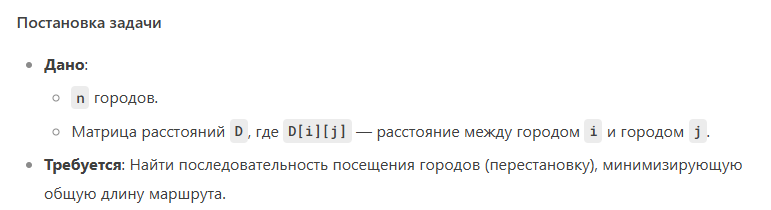

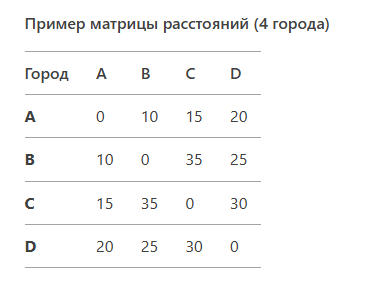



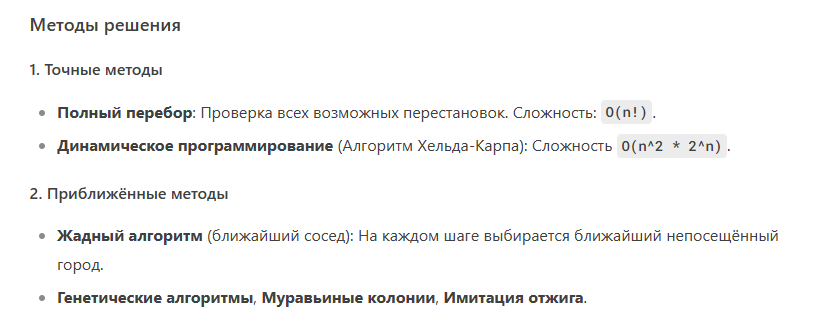

Реализация на Python
1. Жадный алгоритм (ближайший сосед)

In [ ]:
import numpy as np

def tsp_greedy(dist_matrix):
    n = len(dist_matrix)
    unvisited = set(range(n))
    current = 0  # Начинаем с города 0
    unvisited.remove(current)
    path = [current]
    total_distance = 0

    while unvisited:
        next_city = min(unvisited, key=lambda x: dist_matrix[current][x])
        total_distance += dist_matrix[current][next_city]
        current = next_city
        path.append(current)
        unvisited.remove(current)

    # Возвращаемся в начальный город
    total_distance += dist_matrix[current][0]
    path.append(0)
    return path, total_distance

# Пример матрицы расстояний (4 города)
dist_matrix = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

path, distance = tsp_greedy(dist_matrix)
print("Маршрут:", path)
print("Общая дистанция:", distance)

Маршрут: [0, 1, 3, 2, 0]
Общая дистанция: 80


2. Точное решение (полный перебор для малых n)

In [ ]:
import itertools

def tsp_brute_force(dist_matrix):
    n = len(dist_matrix)
    min_distance = float('inf')
    best_path = []

    for perm in itertools.permutations(range(1, n)):
        current_distance = 0
        previous = 0
        for city in perm:
            current_distance += dist_matrix[previous][city]
            previous = city
        current_distance += dist_matrix[previous][0]  # Возврат в начальный город
        if current_distance < min_distance:
            min_distance = current_distance
            best_path = [0] + list(perm) + [0]
    return best_path, min_distance

path, distance = tsp_brute_force(dist_matrix)
print("Оптимальный маршрут:", path)
print("Минимальная дистанция:", distance)

Оптимальный маршрут: [0, 1, 3, 2, 0]
Минимальная дистанция: 80


Визуализация маршрута (с использованием matplotlib)

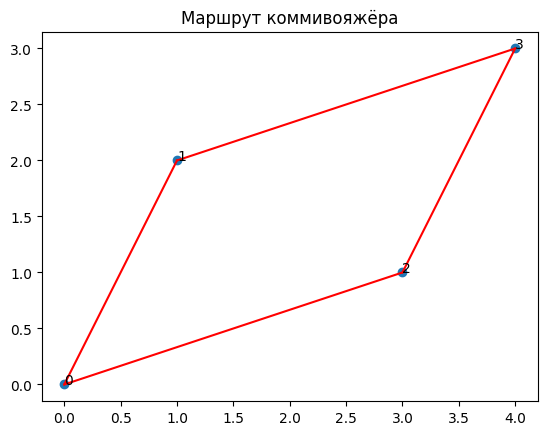

In [ ]:
import matplotlib.pyplot as plt

# Координаты городов (для примера)
coordinates = {
    0: (0, 0),
    1: (1, 2),
    2: (3, 1),
    3: (4, 3)
}

# Рисуем города
plt.scatter(*zip(*coordinates.values()))
for city, (x, y) in coordinates.items():
    plt.text(x, y, str(city))

# Рисуем маршрут
path = [0, 1, 3, 2, 0]
for i in range(len(path)-1):
    x1, y1 = coordinates[path[i]]
    x2, y2 = coordinates[path[i+1]]
    plt.plot([x1, x2], [y1, y2], 'r-')

plt.title("Маршрут коммивояжёра")
plt.show()

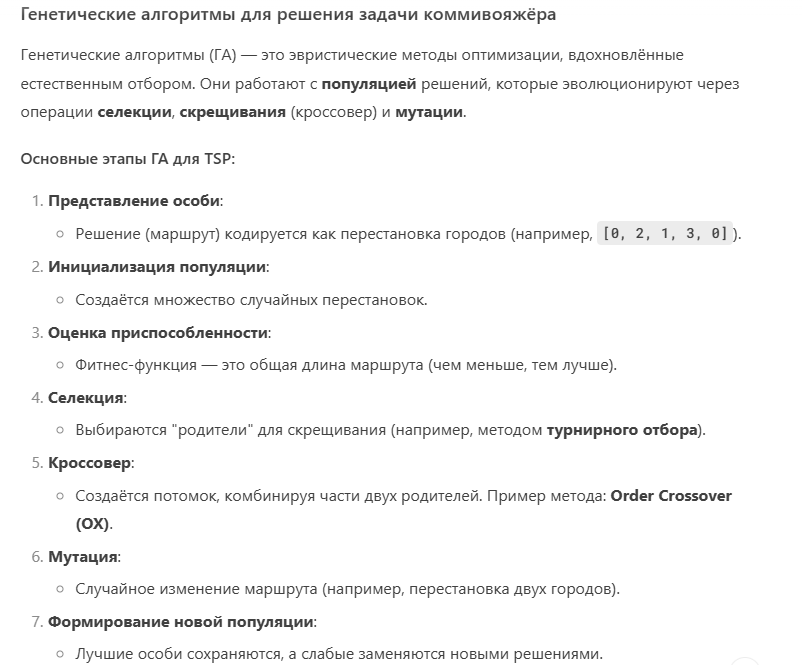

Пример реализации Генетического алгоритма на Python (с использованием библиотеки DEAP)

Установим библиотеку DEAP

In [ ]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms

# Задаём матрицу расстояний (пример для 5 городов)
dist_matrix = [
    [0, 12, 10, 19, 8],
    [12, 0, 3, 7, 2],
    [10, 3, 0, 6, 20],
    [19, 7, 6, 0, 4],
    [8, 2, 20, 4, 0]
]

# Создаём классы для фитнес-функции и особи
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(dist_matrix)), len(dist_matrix))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Фитнес-функция (расчёт длины маршрута)
def eval_tsp(individual):
    distance = 0
    for i in range(len(individual)):
        start = individual[i]
        end = individual[(i + 1) % len(individual)]
        distance += dist_matrix[start][end]
    return (distance,)

toolbox.register("evaluate", eval_tsp)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)  # Ordered Crossover (OX)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)

# Параметры алгоритма
population = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda x: sum(val[0] for val in x) / len(x))
stats.register("min", lambda x: min(val[0] for val in x))

# Запуск ГА
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2,
                               ngen=100, stats=stats, halloffame=hof, verbose=False)

best_route = hof[0]
best_distance = eval_tsp(best_route)[0]
print("Лучший маршрут:", best_route + [best_route[0]])
print("Длина маршрута:", best_distance)

Лучший маршрут: [2, 0, 4, 3, 1, 2]
Длина маршрута: 32


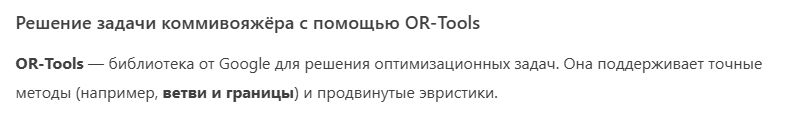

Установим библиотеку OR-Tools

In [1]:
pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def solve_tsp_ortools(dist_matrix):
    # Создаём модель
    manager = pywrapcp.RoutingIndexManager(len(dist_matrix), 1, 0)
    routing = pywrapcp.RoutingModel(manager)

    # Задаём функцию расстояния
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return dist_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Настраиваем поиск
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.seconds = 5

    # Решаем задачу
    solution = routing.SolveWithParameters(search_parameters)

    # Извлекаем результат
    if solution:
        index = routing.Start(0)
        route = []
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        route.append(0)  # Возвращаемся в начальный город
        total_distance = solution.ObjectiveValue()
        return route, total_distance
    return None, None

# Пример использования
route, distance = solve_tsp_ortools(dist_matrix)
print("OR-Tools маршрут:", route)
print("Длина маршрута:", distance)

OR-Tools маршрут: [0, 4, 3, 1, 2, 0]
Длина маршрута: 32


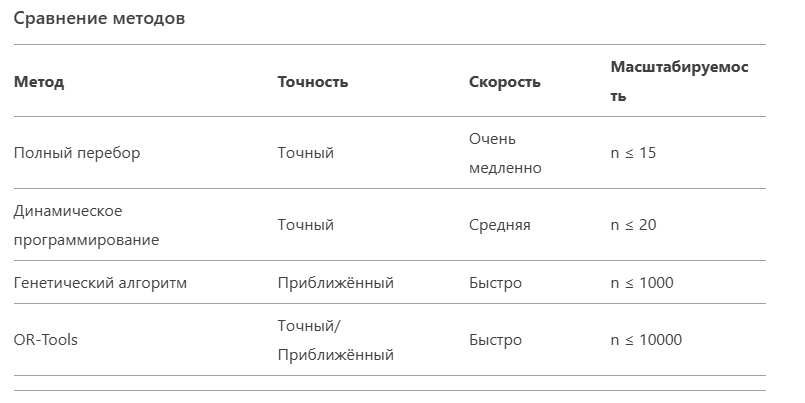

Модернизируем задачу. Пользователь может задать количество городов, а расстояния между ними генерируются автоматически на основе случайных координат (для простоты). Результат отображается графически. Инструмент решения - OR-Tools

Введите количество городов (минимум 2): 6
Маршрут: [0, 5, 3, 2, 1, 4, 0]
Общая длина: 285.63


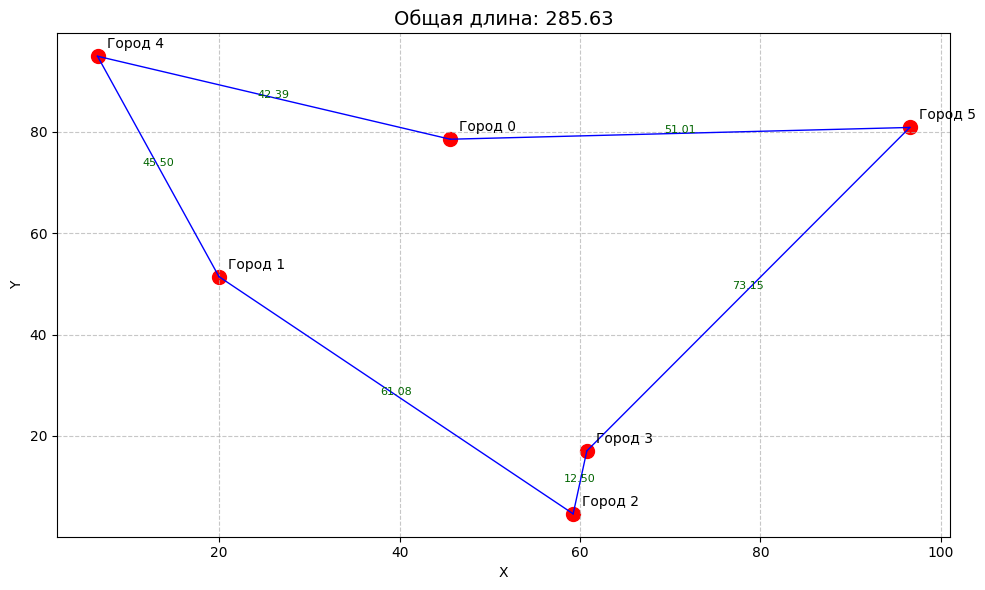

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def generate_cities(num_cities):
    # Генерация случайных координат без фиксированного сида
    return np.random.rand(num_cities, 2) * 100

def create_distance_matrix(coords):
    n = len(coords)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                dist_matrix[i][j] = np.linalg.norm(coords[i] - coords[j])
    return dist_matrix

def solve_tsp(dist_matrix):
    manager = pywrapcp.RoutingIndexManager(len(dist_matrix), 1, 0)
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return int(dist_matrix[from_node][to_node] * 1000)

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.seconds = 5

    solution = routing.SolveWithParameters(search_parameters)

    if solution:
        route = []
        index = routing.Start(0)
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        route.append(0)
        return route, solution.ObjectiveValue() / 1000
    return None, None

def plot_route(coords, route, total_distance):
    plt.figure(figsize=(10, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c='red', s=100)

    # Подписи городов
    for i, (x, y) in enumerate(coords):
        plt.text(x + 1, y + 1, f"Город {i}", fontsize=10, ha='left', va='bottom')

    # Рисуем маршрут
    for i in range(len(route)-1):
        start = coords[route[i]]
        end = coords[route[i+1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'b-', lw=1)
        mid_x = (start[0] + end[0]) / 2
        mid_y = (start[1] + end[1]) / 2
        segment_distance = np.linalg.norm(start - end)
        plt.text(mid_x, mid_y, f"{segment_distance:.2f}", fontsize=8, color='darkgreen', ha='center')

    plt.title(f"Общая длина: {total_distance:.2f}", fontsize=14)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    num_cities = int(input("Введите количество городов (минимум 2): "))
    if num_cities < 2:
        print("Ошибка: нужно минимум 2 города.")
    else:
        coords = generate_cities(num_cities)  # Новые координаты при каждом запуске!
        dist_matrix = create_distance_matrix(coords)
        route, total_distance = solve_tsp(dist_matrix)

        if route:
            print(f"Маршрут: {route}")
            print(f"Общая длина: {total_distance:.2f}")
            plot_route(coords, route, total_distance)
        else:
            print("Решение не найдено.")

In [ ]:
import random
from random import randint
from prettytable import PrettyTable

def generate_variant(variant_num):
    random.seed(variant_num)

    # Генерация данных
    supply = [randint(100, 500) for _ in range(5)]
    total_supply = sum(supply)

    demand = [randint(100, 500) for _ in range(5)]
    total_demand = sum(demand)
    demand = [int(d * total_supply / total_demand) for d in demand]
    demand[0] += total_supply - sum(demand)

    costs = [[randint(1, 20) for _ in range(5)] for _ in range(5)]

    return {
        'variant': variant_num,
        'supply': supply,
        'demand': demand,
        'costs': costs
    }

def print_variant(data):
    # Таблица для основных данных
    main_table = PrettyTable()
    main_table.field_names = ["Вариант", "Поставщики", "Потребители", "Общий объем"]
    main_table.add_row([
        data['variant'],
        ', '.join(map(str, data['supply'])),
        ', '.join(map(str, data['demand'])),
        sum(data['supply'])
    ])

    # Таблица для матрицы стоимостей
    cost_table = PrettyTable()
    cost_table.field_names = ["Поставщик \ Потребитель", "1", "2", "3", "4", "5"]
    for i, row in enumerate(data['costs']):
        cost_table.add_row([f"Поставщик {i+1}"] + row)

    # Вывод
    print(main_table)
    print("Матрица стоимостей:")
    print(cost_table)
    print("\n" + "="*80 + "\n")

def main():
    for variant_num in range(1, 28):
        data = generate_variant(variant_num)

        # Проверка баланса
        if sum(data['supply']) != sum(data['demand']):
            print(f"Ошибка в варианте {variant_num}")
            continue

        print_variant(data)

if __name__ == "__main__":
    main()

+---------+-------------------------+-------------------------+-------------+
| Вариант |        Поставщики       |       Потребители       | Общий объем |
+---------+-------------------------+-------------------------+-------------+
|    1    | 168, 391, 491, 132, 230 | 138, 297, 412, 278, 287 |     1412    |
+---------+-------------------------+-------------------------+-------------+
Матрица стоимостей:
+-------------------------+----+----+----+----+----+
| Поставщик \ Потребитель | 1  | 2  | 3  | 4  | 5  |
+-------------------------+----+----+----+----+----+
|       Поставщик 1       | 13 | 7  | 4  | 16 | 1  |
|       Поставщик 2       | 13 | 14 | 20 | 1  | 15 |
|       Поставщик 3       | 9  | 8  | 19 | 4  | 11 |
|       Поставщик 4       | 1  | 1  | 1  | 18 | 1  |
|       Поставщик 5       | 13 | 7  | 14 | 1  | 17 |
+-------------------------+----+----+----+----+----+


+---------+-------------------------+-------------------------+-------------+
| Вариант |        Поставщики    